In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

In [2]:
taxi = pd.read_csv('edited_taxi.csv')
feature_n, features = get_features(taxi)

In [3]:
test = dmatrix("{}".format(features), taxi, return_type ="dataframe")
test = test.drop(["id", "store_and_fwd_flag", "holiday_Fri"], axis = 1)
# test = test.drop(["dropoff_longitude", "dropoff_latitude", 
#                       "pickup_longitude", "pickup_latitude"], axis =1) - 얘네 넣는게 낫다는 말이 있어서 넣었습니다.

In [16]:
feature_n, features = get_features(test, 2, -3, scale=True)
feature_n, features

(9,
 'scale(passenger_count) + scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time) + scale(drop_time)')

In [17]:
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()

In [18]:
test, Dropped = erase_outlier_np(result, test, feature_n, dropped=True)
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                 1.357e+05
Date:                Thu, 08 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:52:14   Log-Likelihood:            -1.0825e+07
No. Observations:             1456375   AIC:                         2.165e+07
Df Residuals:                 1456357   BIC:                         2.165e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(vendor_id)[1.0]          802.2756      1.048    765.348      0.000     800.221     804.330
C(vendor_id)[2.0]          802.4625      1.031    778.235      0.000     800.441     804.483
C(weekday)[T.1.0]           62.2087      1.334     46.639      0.000      59.594      64.823
C(weekday)[T.2.0]           86.8402      1.323     65.644      0.000      84.247      89.433
C(weekday)[T.3.0]           94.0122      1.311     71.696      0.000      91.442      96.582
C(weekday)[T.4.0]           78.5344      1.285     61.100      0.000      76.015      81.054
C(weekday)[T.5.0]           76.9367      2.404     32.007      0.000      72.225      81.648
C(weekday)[T.6.0]           14.7501      2.424      6.084      0.000       9.998      19.502
C(holiday)[T.1.0]          -86.3535      2.275    -37.961      0.000     -90.812     -81.895
scale(passenger_count)       5.1751      0.354     14.618      0.000       4.481       5.869
scale(pickup_longitude)    -20.9405      0.401    -52.216      0.000     -21.727     -20.154
scale(pickup_latitude)      27.8330      0.395     70.469      0.000      27.059      28.607
scale(dropoff_longitude)   -33.8604      0.376    -90.164      0.000     -34.596     -33.124
scale(dropoff_latitude)    -42.2452      0.384   -110.106      0.000     -42.997     -41.493
scale(dist)                532.0769      0.434   1226.628      0.000     531.227     532.927
scale(pick_date)            28.5455      0.342     83.346      0.000      27.874      29.217
scale(pick_time)           -39.9019      0.939    -42.501      0.000     -41.742     -38.062
scale(drop_time)            67.5827      0.939     71.963      0.000      65.742      69.423
==============================================================================
Omnibus:                   784286.453   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22084704.742
Skew:                           2.051   Prob(JB):                         0.00
Kurtosis:                      21.631   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# scale된 dist와 좌표값4개를 같이 넣어도 컨디션이 0.1만 증가함

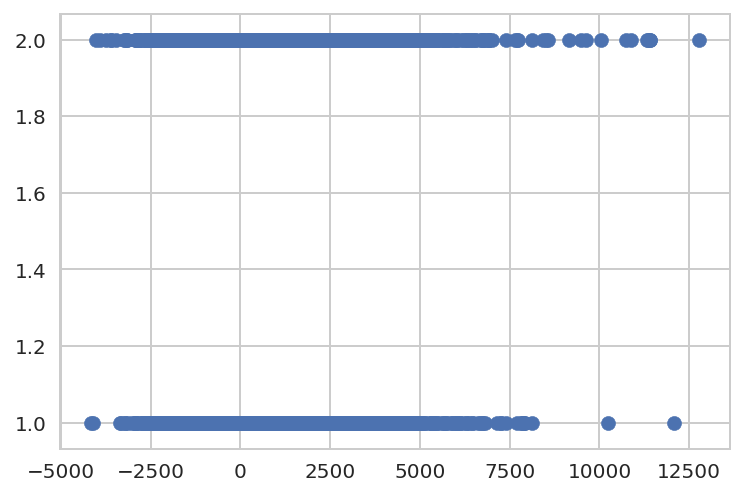

In [30]:
plt.scatter(result.resid, test['vendor_id'])
plt.show()

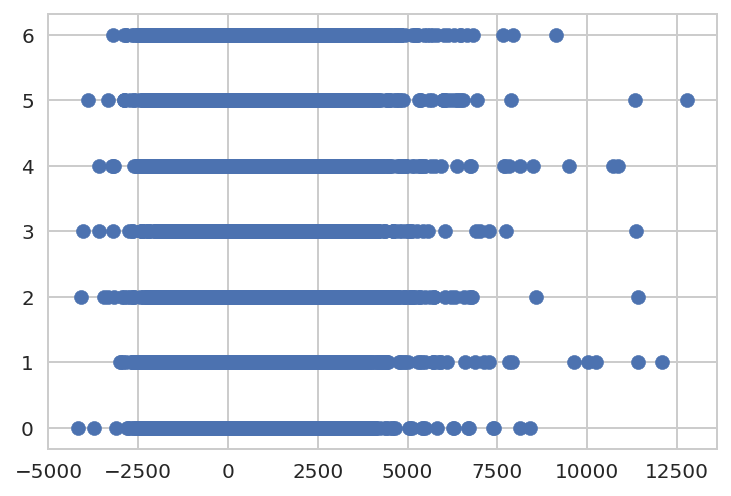

In [28]:
plt.scatter(result.resid, test['weekday'])
plt.show()

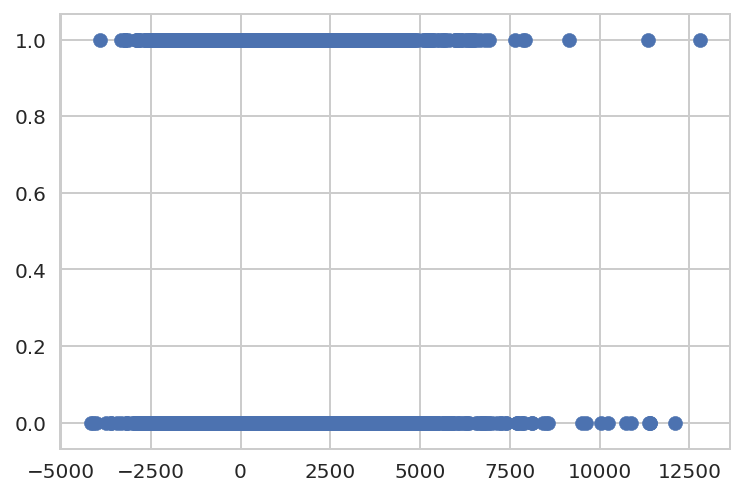

In [29]:
plt.scatter(result.resid, test['holiday'])
plt.show()

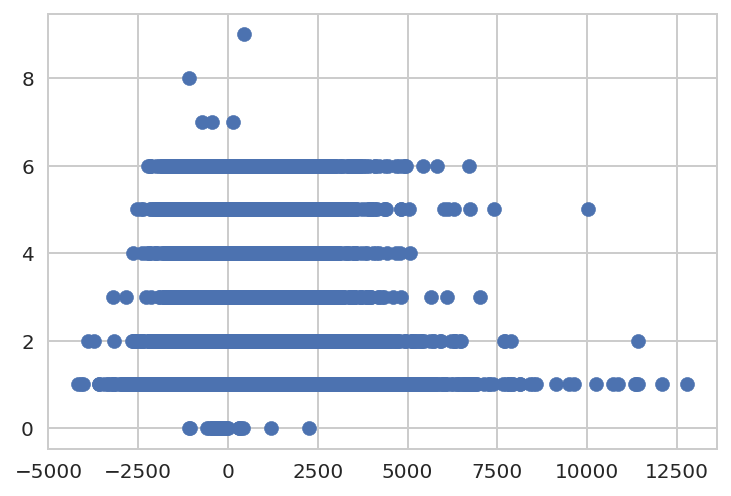

In [22]:
plt.scatter(result.resid, test['passenger_count'])
plt.show()

위 4개는 카테고리거나, 카테고리와 다를바 없는 features

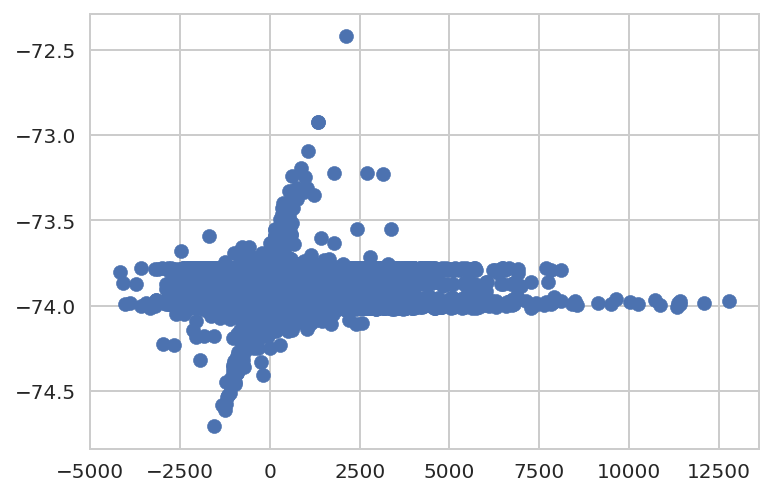

In [24]:
plt.scatter(result.resid, test['pickup_longitude'])
plt.show()

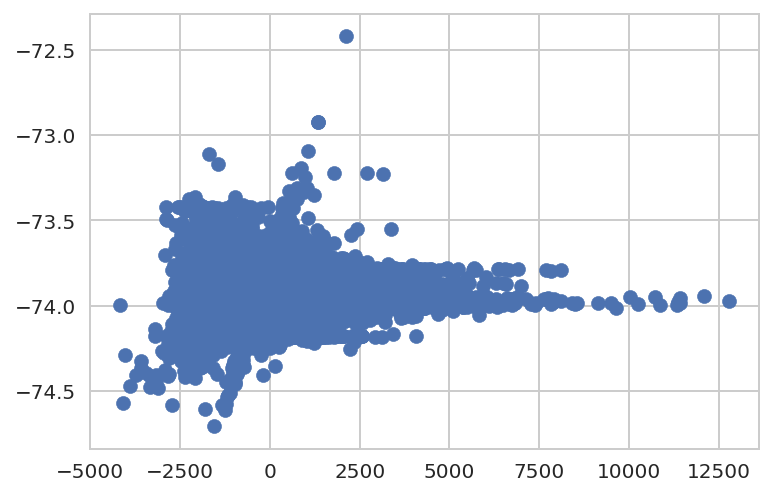

In [25]:
plt.scatter(result.resid, test['dropoff_longitude'])
plt.show()

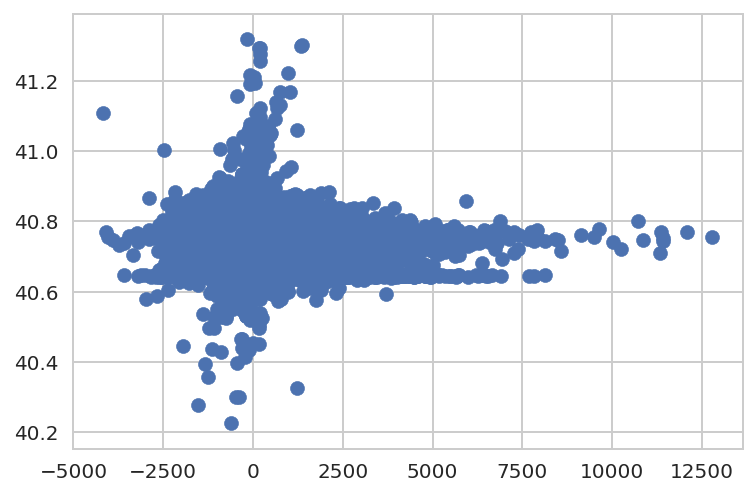

In [26]:
plt.scatter(result.resid, test['pickup_latitude'])
plt.show()

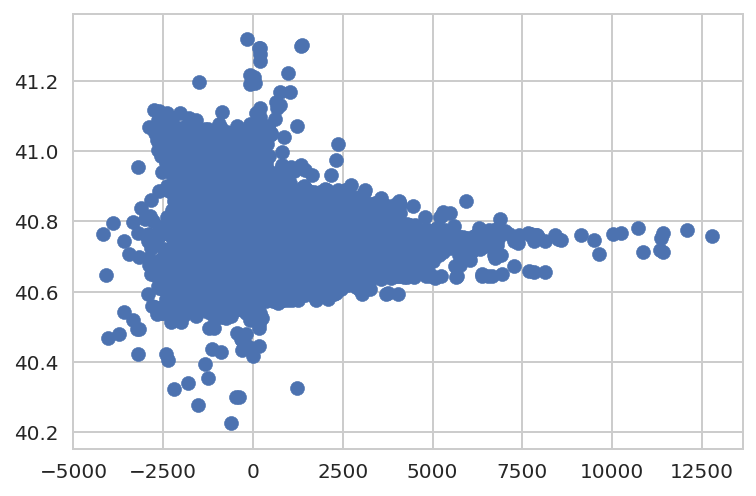

In [27]:
plt.scatter(result.resid, test['dropoff_latitude'])
plt.show()

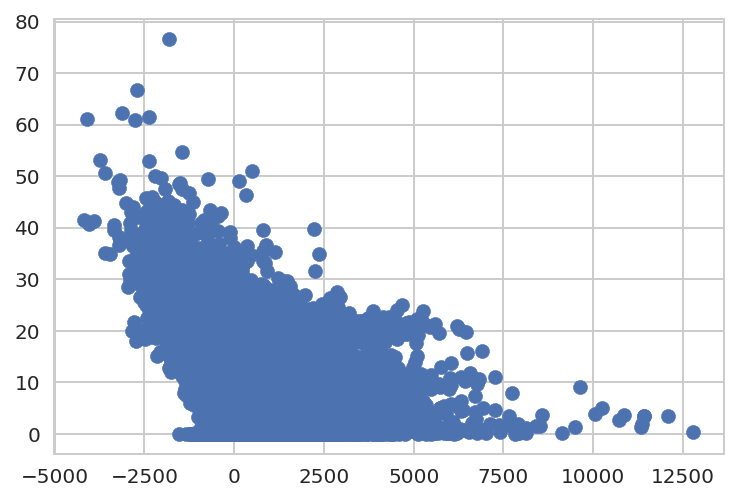

In [19]:
plt.scatter(result.resid, test['dist'])
plt.show()

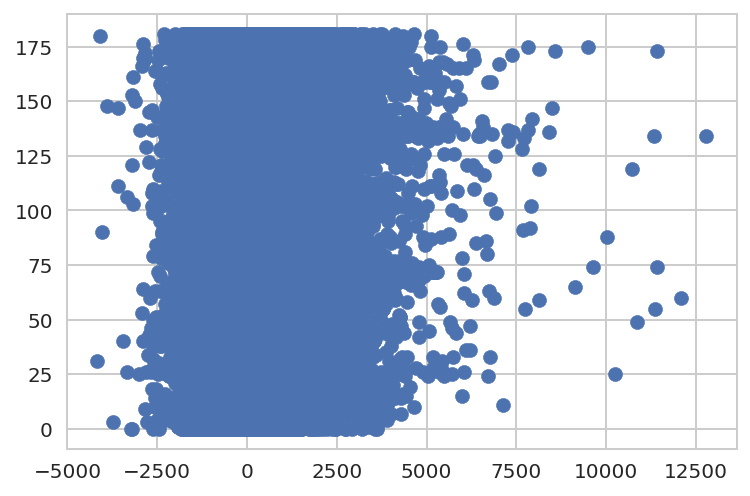

In [20]:
plt.scatter(result.resid, test['pick_date'])
plt.show()

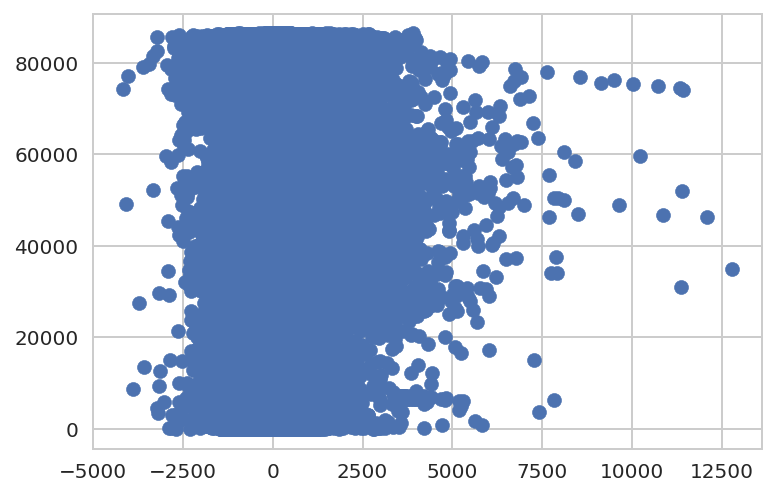

In [21]:
plt.scatter(result.resid, test['pick_time'])
plt.show()

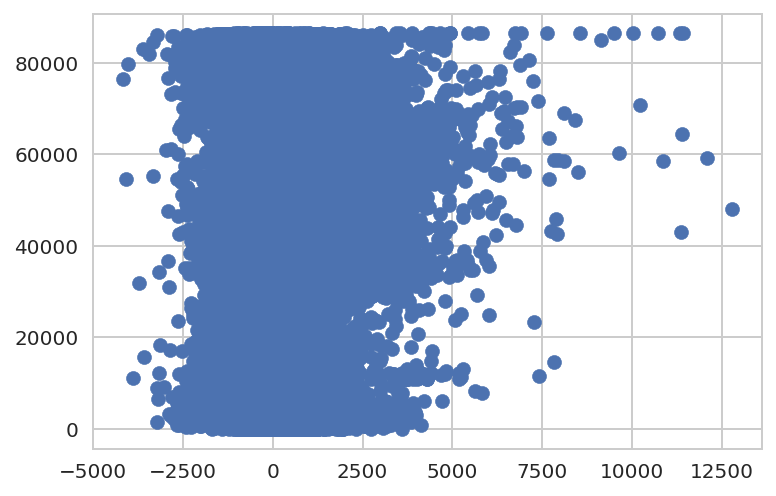

In [23]:
plt.scatter(result.resid, test['drop_time'])
plt.show()

In [31]:
test, Dropped = erase_outlier_np(result, test, feature_n, dropped=True) # 2번 제거
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.759e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:17:32   Log-Likelihood:            -9.6543e+06
No. Observations:             1369386   AIC:                         1.931e+07
Df Residuals:                 1369368   BIC:                         1.931e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(vendor_id)[1.0]          717.7589      0.739    971.267      0.000     716.311     719.207
C(vendor_id)[2.0]          717.2979      0.728    985.707      0.000     715.872     718.724
C(weekday)[T.1.0]           52.1026      0.940     55.427      0.000      50.260      53.945
C(weekday)[T.2.0]           67.8359      0.933     72.709      0.000      66.007      69.664
C(weekday)[T.3.0]           73.7304      0.925     79.700      0.000      71.917      75.544
C(weekday)[T.4.0]           59.8465      0.908     65.929      0.000      58.067      61.626
C(weekday)[T.5.0]           89.8434      1.725     52.069      0.000      86.462      93.225
C(weekday)[T.6.0]           31.5958      1.740     18.153      0.000      28.184      35.007
C(holiday)[T.1.0]          -93.9018      1.643    -57.151      0.000     -97.122     -90.682
scale(passenger_count)       1.5423      0.249      6.190      0.000       1.054       2.031
scale(pickup_longitude)    -33.1922      0.275   -120.673      0.000     -33.731     -32.653
scale(pickup_latitude)      31.1206      0.290    107.461      0.000      30.553      31.688
scale(dropoff_longitude)   -32.9340      0.275   -119.777      0.000     -33.473     -32.395
scale(dropoff_latitude)    -37.8635      0.292   -129.844      0.000     -38.435     -37.292
scale(dist)                431.0899      0.280   1537.171      0.000     430.540     431.640
scale(pick_date)            17.1462      0.241     71.222      0.000      16.674      17.618
scale(pick_time)           -62.9535      0.825    -76.321      0.000     -64.570     -61.337
scale(drop_time)            87.8573      0.825    106.519      0.000      86.241      89.474
==============================================================================
Omnibus:                   142126.444   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198731.750
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       3.865   Cond. No.                         16.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
test, Dropped = erase_outlier_np(result, test, feature_n, dropped=True) # 3번 제거
model =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(weekday) + C(holiday) + {} + 0".format(features), data=test)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                 1.924e+05
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:21:58   Log-Likelihood:            -8.8225e+06
No. Observations:             1285043   AIC:                         1.765e+07
Df Residuals:                 1285025   BIC:                         1.765e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(vendor_id)[1.0]          667.9622      0.635   1052.661      0.000     666.718     669.206
C(vendor_id)[2.0]          667.2108      0.625   1067.205      0.000     665.985     668.436
C(weekday)[T.1.0]           42.8684      0.808     53.074      0.000      41.285      44.451
C(weekday)[T.2.0]           55.4633      0.802     69.146      0.000      53.891      57.035
C(weekday)[T.3.0]           60.8814      0.796     76.512      0.000      59.322      62.441
C(weekday)[T.4.0]           51.6571      0.781     66.153      0.000      50.127      53.188
C(weekday)[T.5.0]           91.4523      1.508     60.658      0.000      88.497      94.407
C(weekday)[T.6.0]           38.0420      1.520     25.021      0.000      35.062      41.022
C(holiday)[T.1.0]          -94.5668      1.442    -65.581      0.000     -97.393     -91.741
scale(passenger_count)      -0.0910      0.214     -0.425      0.671      -0.510       0.328
scale(pickup_longitude)    -31.3755      0.240   -130.614      0.000     -31.846     -30.905
scale(pickup_latitude)      32.0684      0.262    122.482      0.000      31.555      32.582
scale(dropoff_longitude)   -29.1395      0.245   -119.113      0.000     -29.619     -28.660
scale(dropoff_latitude)    -35.9141      0.265   -135.555      0.000     -36.433     -35.395
scale(dist)                383.7173      0.232   1657.447      0.000     383.264     384.171
scale(pick_date)            11.9873      0.207     58.040      0.000      11.582      12.392
scale(pick_time)          -100.3416      0.959   -104.604      0.000    -102.222     -98.462
scale(drop_time)           124.1622      0.959    129.465      0.000     122.282     126.042
==============================================================================
Omnibus:                    74271.522   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87903.933
Skew:                           0.638   Prob(JB):                         0.00
Kurtosis:                       3.116   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

passenger_count의 계수가 음수로 바뀌고 유의확률이 67%로 급상승 - 아웃라이어를 더 제거하면 다시 내려갈지도?
- $R^2$값은 증가

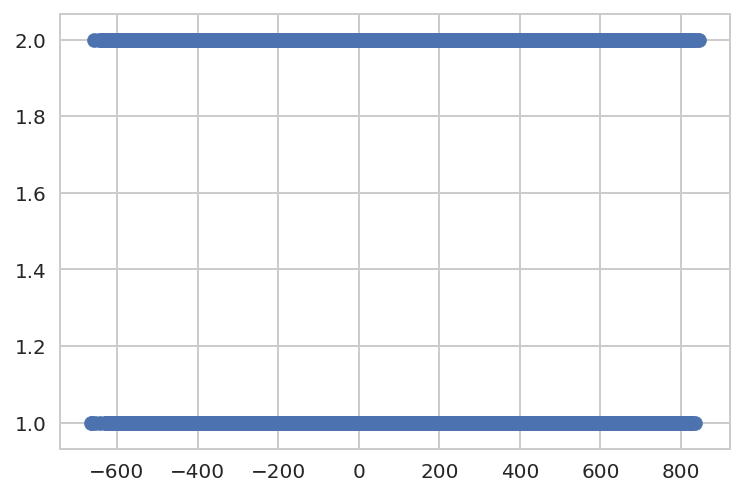

In [33]:
plt.scatter(result.resid, test['vendor_id'])
plt.show()

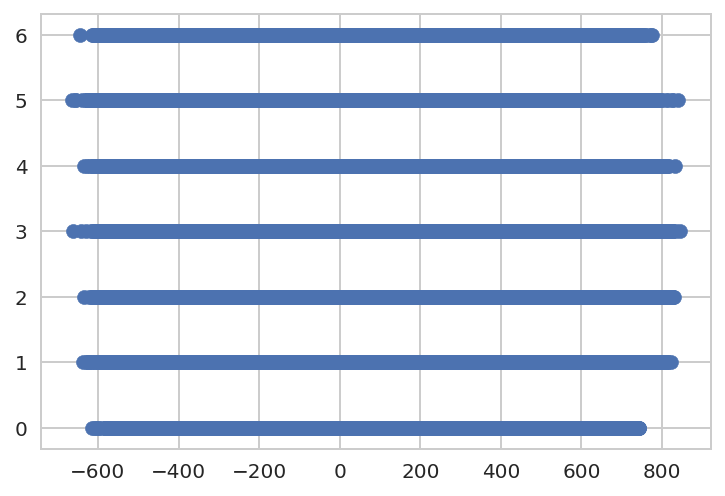

In [34]:
plt.scatter(result.resid, test['weekday'])
plt.show()

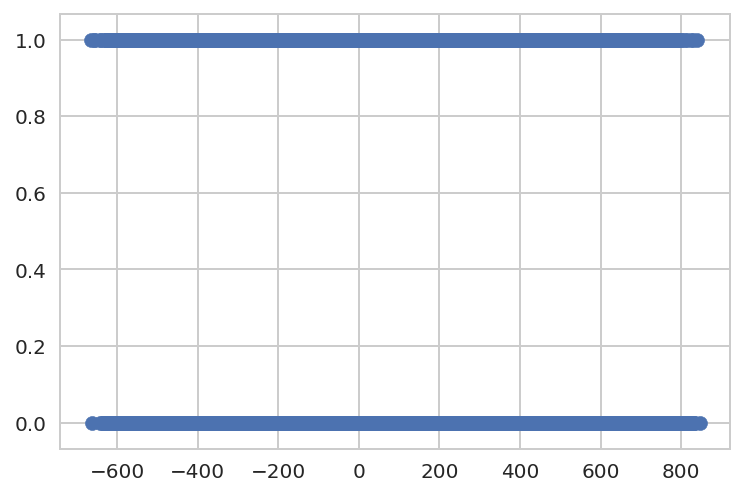

In [35]:
plt.scatter(result.resid, test['holiday'])
plt.show()

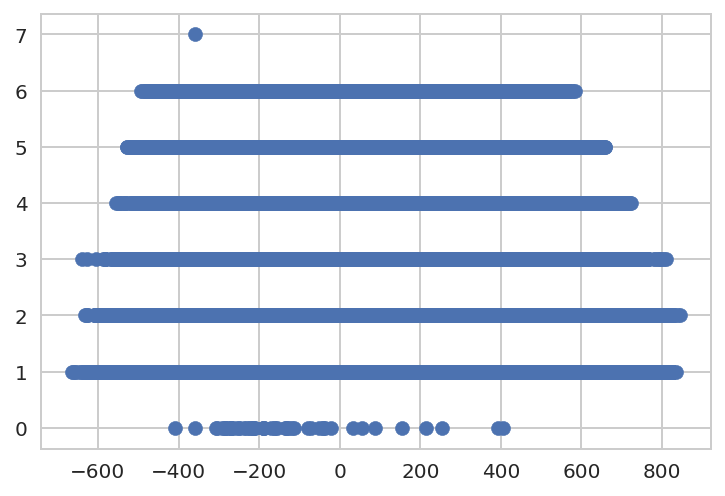

In [36]:
plt.scatter(result.resid, test['passenger_count'])
plt.show()

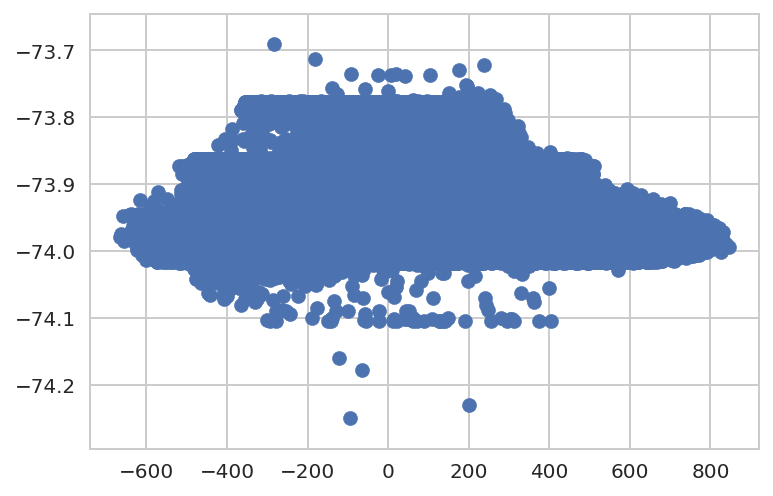

In [37]:
plt.scatter(result.resid, test['pickup_longitude'])
plt.show()

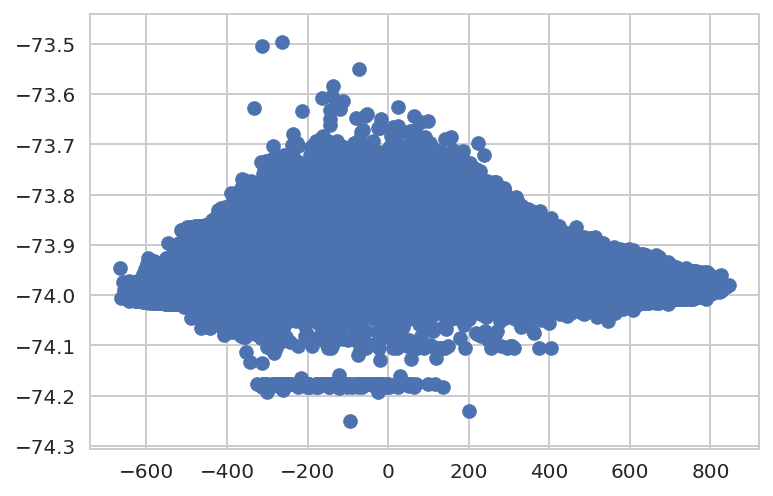

In [38]:
plt.scatter(result.resid, test['dropoff_longitude'])
plt.show()

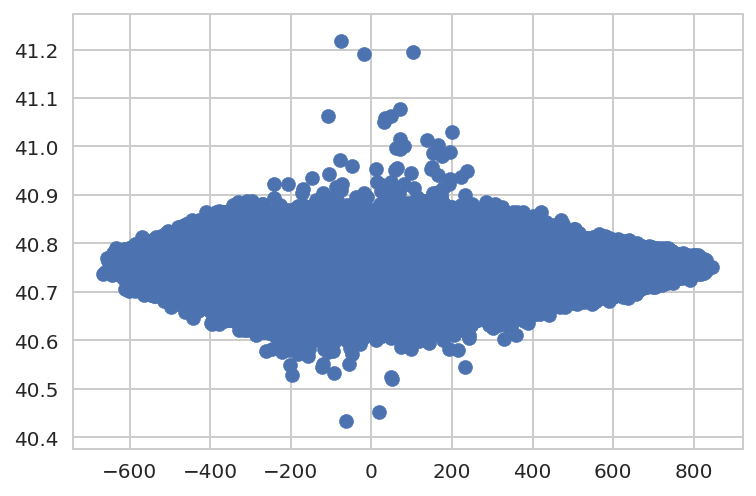

In [39]:
plt.scatter(result.resid, test['pickup_latitude'])
plt.show()

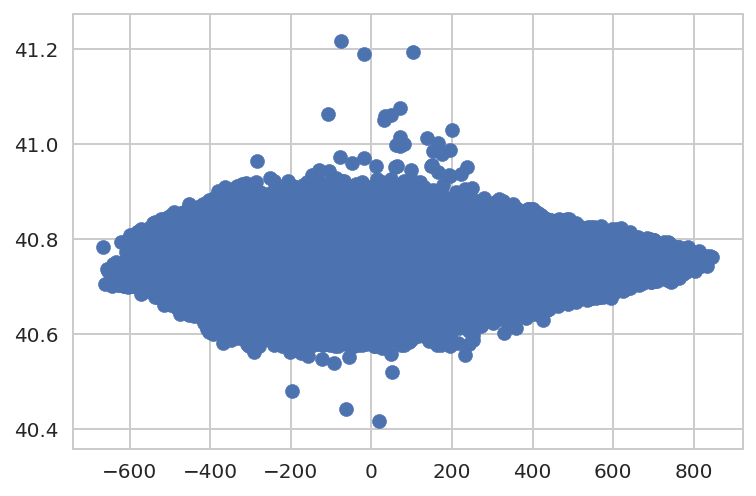

In [40]:
plt.scatter(result.resid, test['dropoff_latitude'])
plt.show()

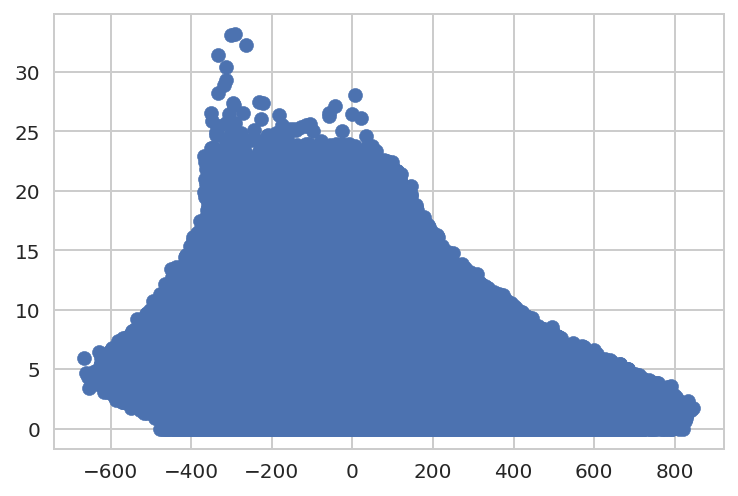

In [41]:
plt.scatter(result.resid, test['dist'])
plt.show()

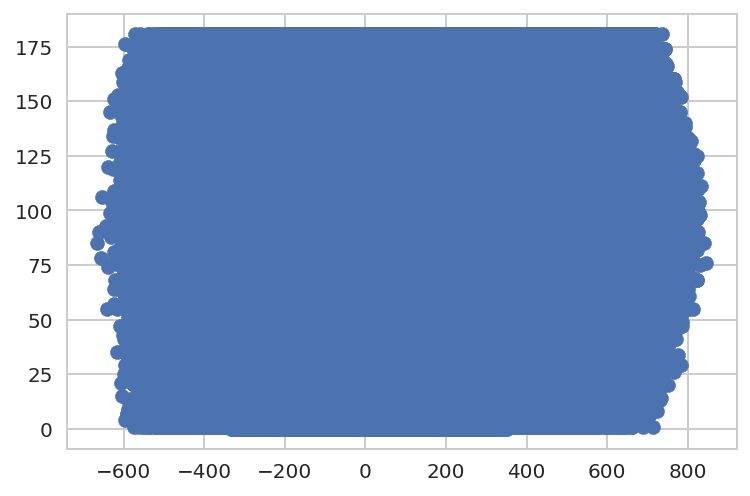

In [42]:
plt.scatter(result.resid, test['pick_date'])
plt.show()

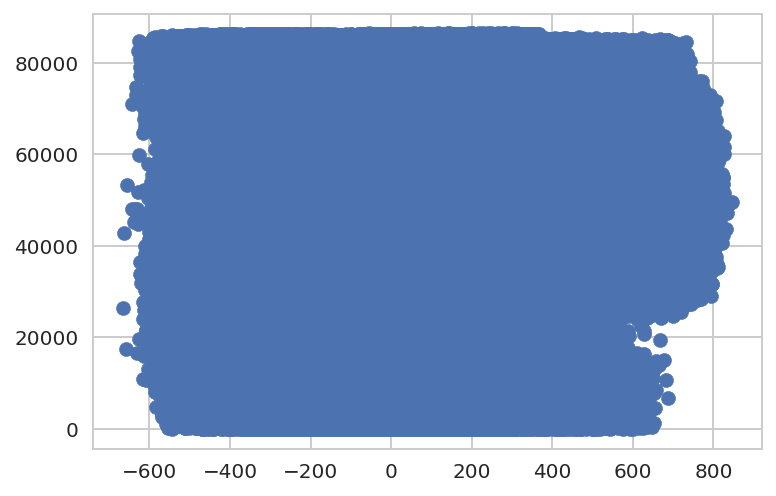

In [43]:
plt.scatter(result.resid, test['pick_time'])
plt.show()

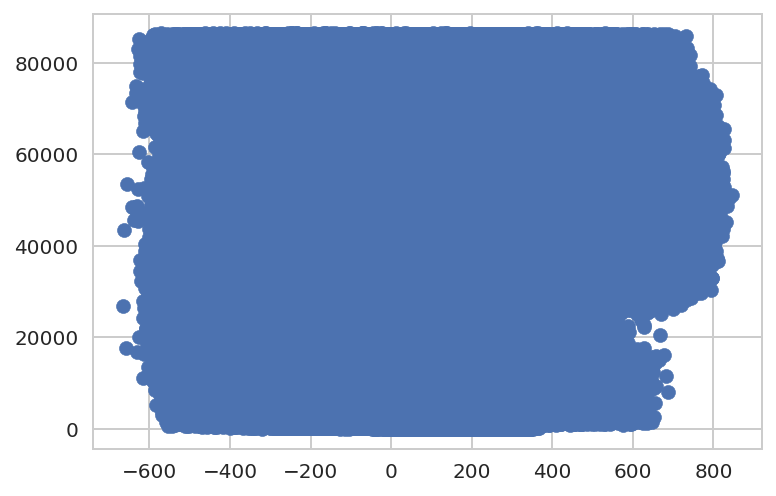

In [44]:
plt.scatter(result.resid, test['drop_time'])
plt.show()